<a href="https://colab.research.google.com/github/Saumitra-Shukla/Regression-and-classification-of-tabular-data-/blob/master/Multiclass_classification_with_ROC_and_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df=pd.read_csv("https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv",na_values=['NA','?'])

display(df[0:5])

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
#k x_columns=df.columns.drop('id')


dummies=pd.get_dummies(df['diagnosis'])
y=dummies.columns.values

In [0]:
from scipy.stats import zscore

x_columns=df.columns.drop('diagnosis').drop('id')
for col in x_columns:
  df[col]=zscore(df[col])
x=df[x_columns].values
y= df['diagnosis'].map({'M':1,'B':0})
       

In [0]:
print(y)

In [12]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

model=Sequential()
model.add(Dense(100,input_dim=x.shape[1],activation='relu',kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(1,activation='linear',kernel_initializer='random_normal'))
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=5,restore_best_weights=True)
checkpointer=ModelCheckpoint(filepath="best_weights.hdf5",verbose=0,save_best_only=True)

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],epochs=100)







Train on 426 samples, validate on 143 samples
Epoch 1/100
426/426 [==============================] - 1s 1ms/sample - loss: 1.4447 - acc: 0.6291 - val_loss: 0.8180 - val_acc: 0.6224
Epoch 2/100
426/426 [==============================] - 0s 137us/sample - loss: 0.6431 - acc: 0.6667 - val_loss: 0.3814 - val_acc: 0.8042
Epoch 3/100
426/426 [==============================] - 0s 132us/sample - loss: 0.3085 - acc: 0.8451 - val_loss: 0.1798 - val_acc: 0.9231
Epoch 4/100
426/426 [==============================] - 0s 126us/sample - loss: 0.1912 - acc: 0.9343 - val_loss: 0.1141 - val_acc: 0.9580
Epoch 5/100
426/426 [==============================] - 0s 130us/sample - loss: 0.1408 - acc: 0.9648 - val_loss: 0.0880 - val_acc: 0.9720
Epoch 6/100
426/426 [==============================] - 0s 124us/sample - loss: 0.1450 - acc: 0.9742 - val_loss: 0.0688 - val_acc: 0.9720
Epoch 7/100
426/426 [==============================] - 0s 134us/sample - loss: 0.0951 - acc: 0.9836 - val_loss: 0.0577 - val_acc: 0.97

In [0]:
model.load_weights('best_weights.hdf5')

In [13]:
!ls

best_weights.hdf5


In [0]:
pred=model.predict(x_test)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

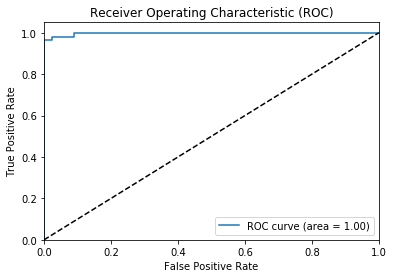

In [22]:
plot_roc(pred,y_test)

In [0]:
print(pred)